# Data Workflow Context (Python)

## Pythonic EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
wine = load_wine(as_frame=True)

In [3]:
wine.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Why `matplotlib` is not that great: google "matplotlib barplot example", versus "ggplot2 barplot example".

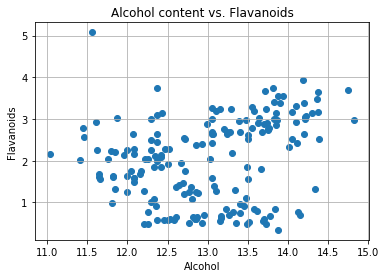

In [4]:
plt.scatter(wine.data["alcohol"], wine.data["flavanoids"])
plt.title("Alcohol content vs. Flavanoids")
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.grid()

Now let's compare the ease of use to another package which is better: `seaborn`. For more information visit [here](https://seaborn.pydata.org/).

In [5]:
import seaborn as sns

/Users/boyanangelov/work/oreilly_lot/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='flavanoids'>

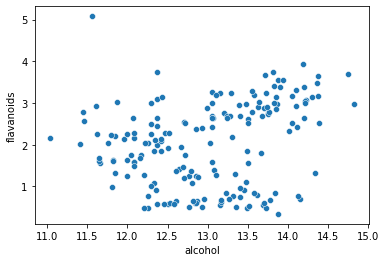

In [27]:
sns.scatterplot(wine.data["alcohol"], wine.data["flavanoids"])

Now let's turn this into a classification problem.

In [8]:
wine.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<AxesSubplot:xlabel='alcohol', ylabel='Count'>

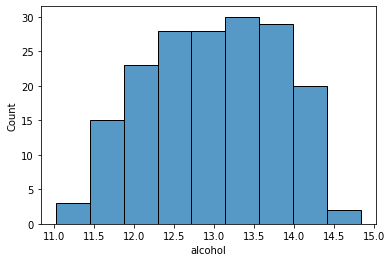

In [9]:
sns.histplot(wine.data["alcohol"])

In [11]:
wine.data["alcohol_binary"] = wine.data["alcohol"] >= 13.0

In [12]:
wine.data["alcohol_binary"].value_counts()

True     92
False    86
Name: alcohol_binary, dtype: int64

## Machine Learning

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, ClassPredictionError

In [18]:
X = wine.data.drop(["alcohol_binary", "alcohol"], axis=1)
y = wine.data["alcohol_binary"]

In [19]:
X.shape

(178, 12)

In [20]:
y.shape

(178,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
preds = clf.predict(X_test)

In [28]:
metrics.accuracy_score(preds, y_test)

0.8305084745762712

In [29]:
metrics.confusion_matrix(preds, y_test)

array([[23,  8],
       [ 2, 26]])

### Model Performance Visualisation with `yellowbrick`

/Users/boyanangelov/work/oreilly_lot/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


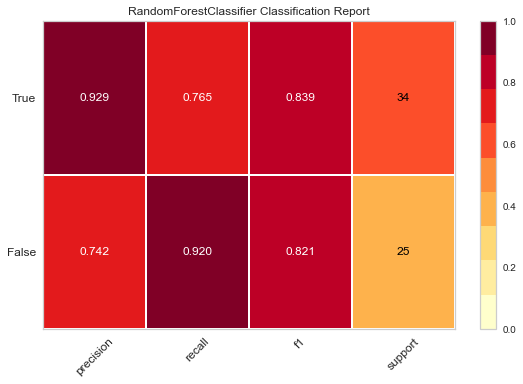

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [33]:
visualizer = ClassificationReport(clf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/boyanangelov/work/oreilly_lot/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


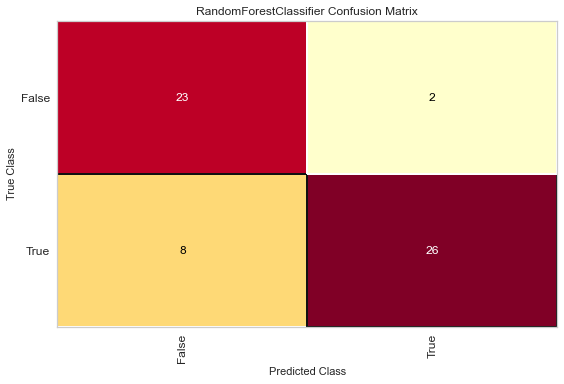

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
visualizer = ConfusionMatrix(clf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/boyanangelov/work/oreilly_lot/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


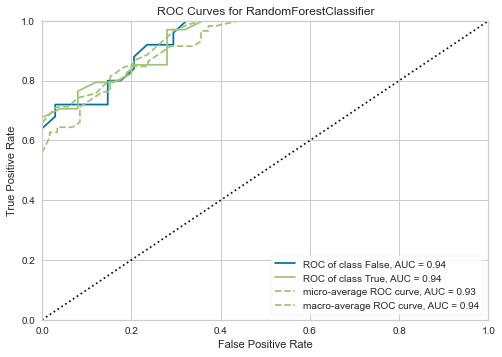

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
visualizer = ROCAUC(clf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/boyanangelov/work/oreilly_lot/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


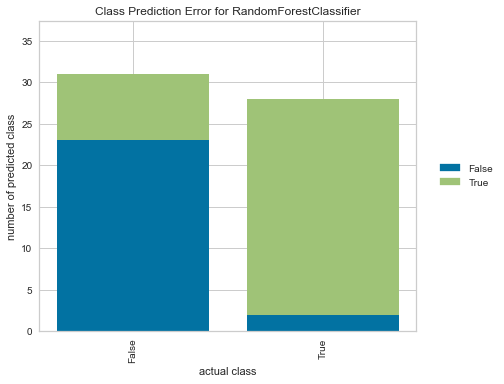

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [39]:
visualizer = ClassPredictionError(clf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()